In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

In [2]:
path = "results/"

In [3]:
# def get_n_of_selectors(data, target):
#     n_of_selectors = 0
#     rv = {}
#     target_found = False
#     for i in range(len(data.columns)):
#         column = data.columns[i]
#         if column != target:
#             n_of_selectors += data[column].nunique()
#             rv[i] = n_of_selectors
#         else:
#             target_found = True
#             rv[i] = n_of_selectors
#     if not target_found:
#         print("Warning:Target not found in data")
#     return rv

# mimic = pd.read_csv("../../data/mimic-iii.csv")
# ab = pd.read_csv("../../data/mimic-iii-preprocessed-db-sample-400.csv")
# mushrooms = pd.read_csv("../../data/agaricus-lepiota.data")

# mimic_selectors = get_n_of_selectors(mimic, "interpretation")
# ab_selectors = get_n_of_selectors(ab, "culture_susceptibility")
# mushrooms_selectors = get_n_of_selectors(mushrooms, "p")

# get_selectors = {
#     "MIMIC": mimic_selectors,
#     "AB": ab_selectors,
#     "Mushrooms": mushrooms_selectors
# }


In [4]:
# get_selectors

In [5]:
df = pd.DataFrame(columns=["Time (s)", "Memory (bytes)", "Algorithm", "Dataset", "Columns"])
for file_name in os.listdir(path):
    file = open(path + file_name, "r")
    file_name = file_name.split(".")[0]
    file_params = file_name.split("_")
    if len(file_params) <= 3:
        file.close()
        continue
    alg = file_params[1]
    dataset = file_params[2]
    columns = int(file_params[3])
    file.readline()
    time, memory = eval(file.readline())
    file.close()
    # try:
    #     selectors = get_selectors[dataset][columns]
    # except KeyError:
    #     print("Error: Dataset or columns not found", dataset, columns)
    df.loc[len(df)] = [time, memory, alg, dataset, columns]


In [6]:
df.head(20)

,Time (s),Memory (bytes),Algorithm,Dataset,Columns
0,0.018888,169762816,BSD,AB,5
1,0.054156,169447424,BSD,AB,6
2,0.060824,170377216,BSD,AB,7
3,0.186335,169906176,BSD,AB,8
4,0.436536,170721280,BSD,AB,9
5,28.635359,189214720,BSD,MIMIC,10
6,45.104543,198107136,BSD,MIMIC,11
7,65.977532,189743104,BSD,MIMIC,12
8,95.488875,190693376,BSD,MIMIC,13
9,0.700098,190033920,BSD,MIMIC,5


In [7]:
## Save figures
base_path = ""
save_flag = False


In [8]:
label_order = ["IDSD", "QFinder", "SDMapStar", "BSD"]
palette = {
    "IDSD": "blue",
    "QFinder": "red",
    "SDMapStar": "green",
    "BSD": "orange"
}

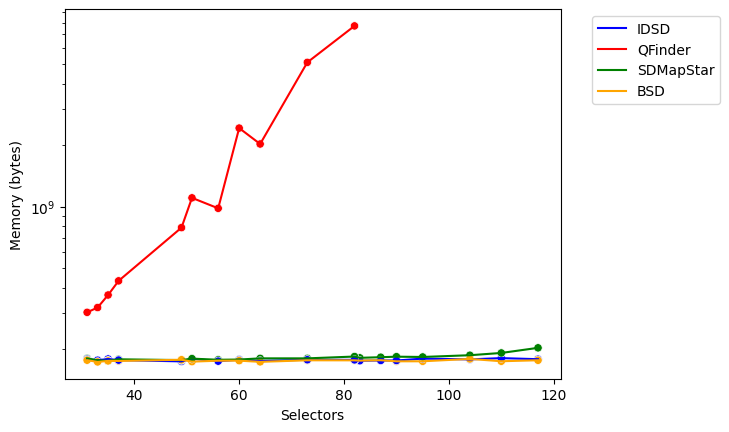

In [ ]:
sns.lineplot(data=df[df["Dataset"] == "Mushrooms"], x="Selectors", y="Memory (bytes)", hue="Algorithm", palette=palette, hue_order=label_order)
sns.scatterplot(data=df[df["Dataset"] == "Mushrooms"], x="Selectors", y="Memory (bytes)", hue="Algorithm", legend=False, palette=palette)
plt.yscale("log")
# plt.title("Maximum memory usage for Mushroom dataset (log scale)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
if save_flag:
    plt.savefig(f"{base_path}/memory_mush.png", bbox_inches='tight')

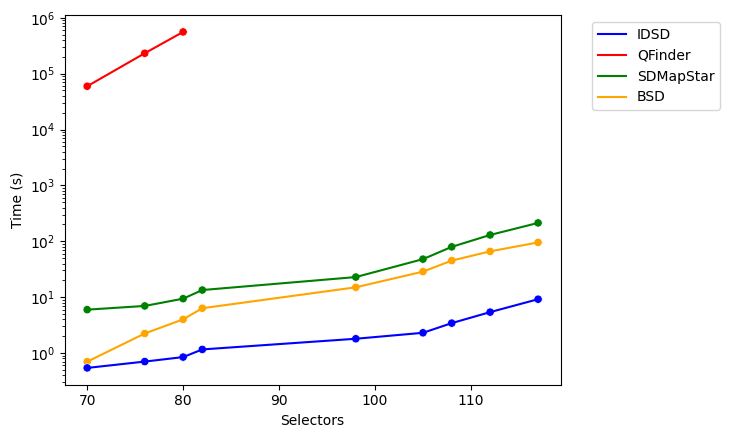

In [ ]:
sns.lineplot(data=df[df["Dataset"] == "MIMIC"], x="Selectors", y="Time (s)", hue="Algorithm", palette=palette, hue_order=label_order)
sns.scatterplot(data=df[df["Dataset"] == "MIMIC"], x="Selectors", y="Time (s)", hue="Algorithm", legend=False, palette=palette)
plt.yscale("log")
# plt.title("Execution time for Staph Aur Coag+ \n dataset (log scale)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
if save_flag:
    plt.savefig(f"{base_path}/time_mimic.png", bbox_inches='tight')

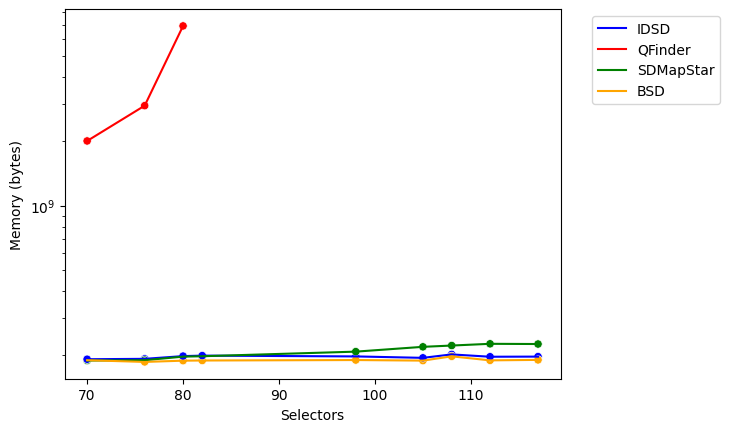

In [ ]:
sns.lineplot(data=df[df["Dataset"] == "MIMIC"], x="Selectors", y="Memory (bytes)", hue="Algorithm", palette=palette, hue_order=label_order)
sns.scatterplot(data=df[df["Dataset"] == "MIMIC"], x="Selectors", y="Memory (bytes)", hue="Algorithm", legend=False, palette=palette)
plt.yscale("log")
# plt.title("Maximum memory usage for Staph Aur Coag+ \n dataset (log scale)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
if save_flag:
    plt.savefig(f"{base_path}/memory_mimic.png", bbox_inches='tight')

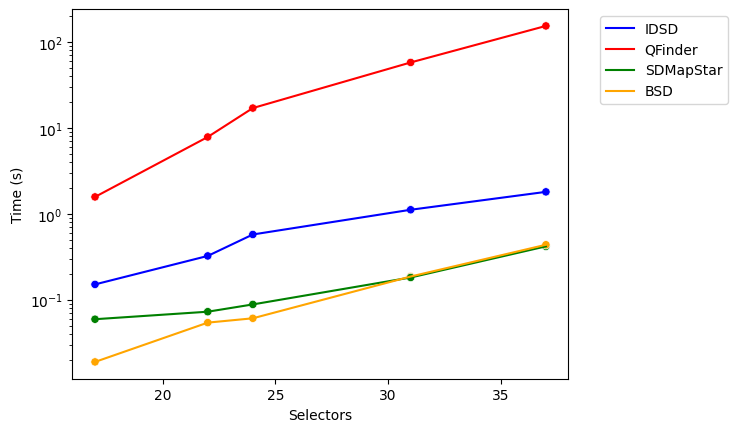

In [ ]:
sns.lineplot(data=df[df["Dataset"] == "AB"], x="Selectors", y="Time (s)", hue="Algorithm", palette=palette, hue_order=label_order)
sns.scatterplot(data=df[df["Dataset"] == "AB"], x="Selectors", y="Time (s)", hue="Algorithm", legend=False, palette=palette)
plt.yscale("log")
#Force x ticks to be integers
plt.xticks(np.arange(20, 40, 5))
# plt.title("Execution time for Vancomycin dataset (log scale)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
if save_flag:
    plt.savefig(f"{base_path}/time_ab.png", bbox_inches='tight')

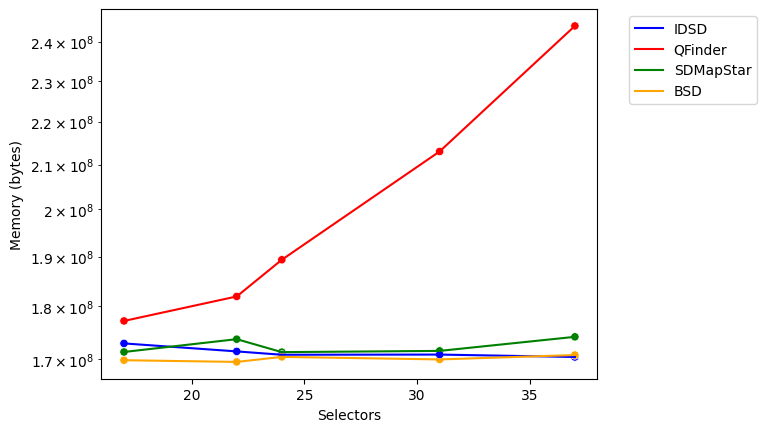

In [ ]:
sns.lineplot(data=df[df["Dataset"] == "AB"], x="Selectors", y="Memory (bytes)", hue="Algorithm", palette=palette, hue_order=label_order)
sns.scatterplot(data=df[df["Dataset"] == "AB"], x="Selectors", y="Memory (bytes)", hue="Algorithm", legend=False, palette=palette)
plt.yscale("log")
# plt.title("Maximum memory usage for\nVancomycin dataset (log scale)")
plt.xticks(np.arange(20, 40, 5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
if save_flag:
    plt.savefig(f"{base_path}/memory_ab.png", bbox_inches='tight')

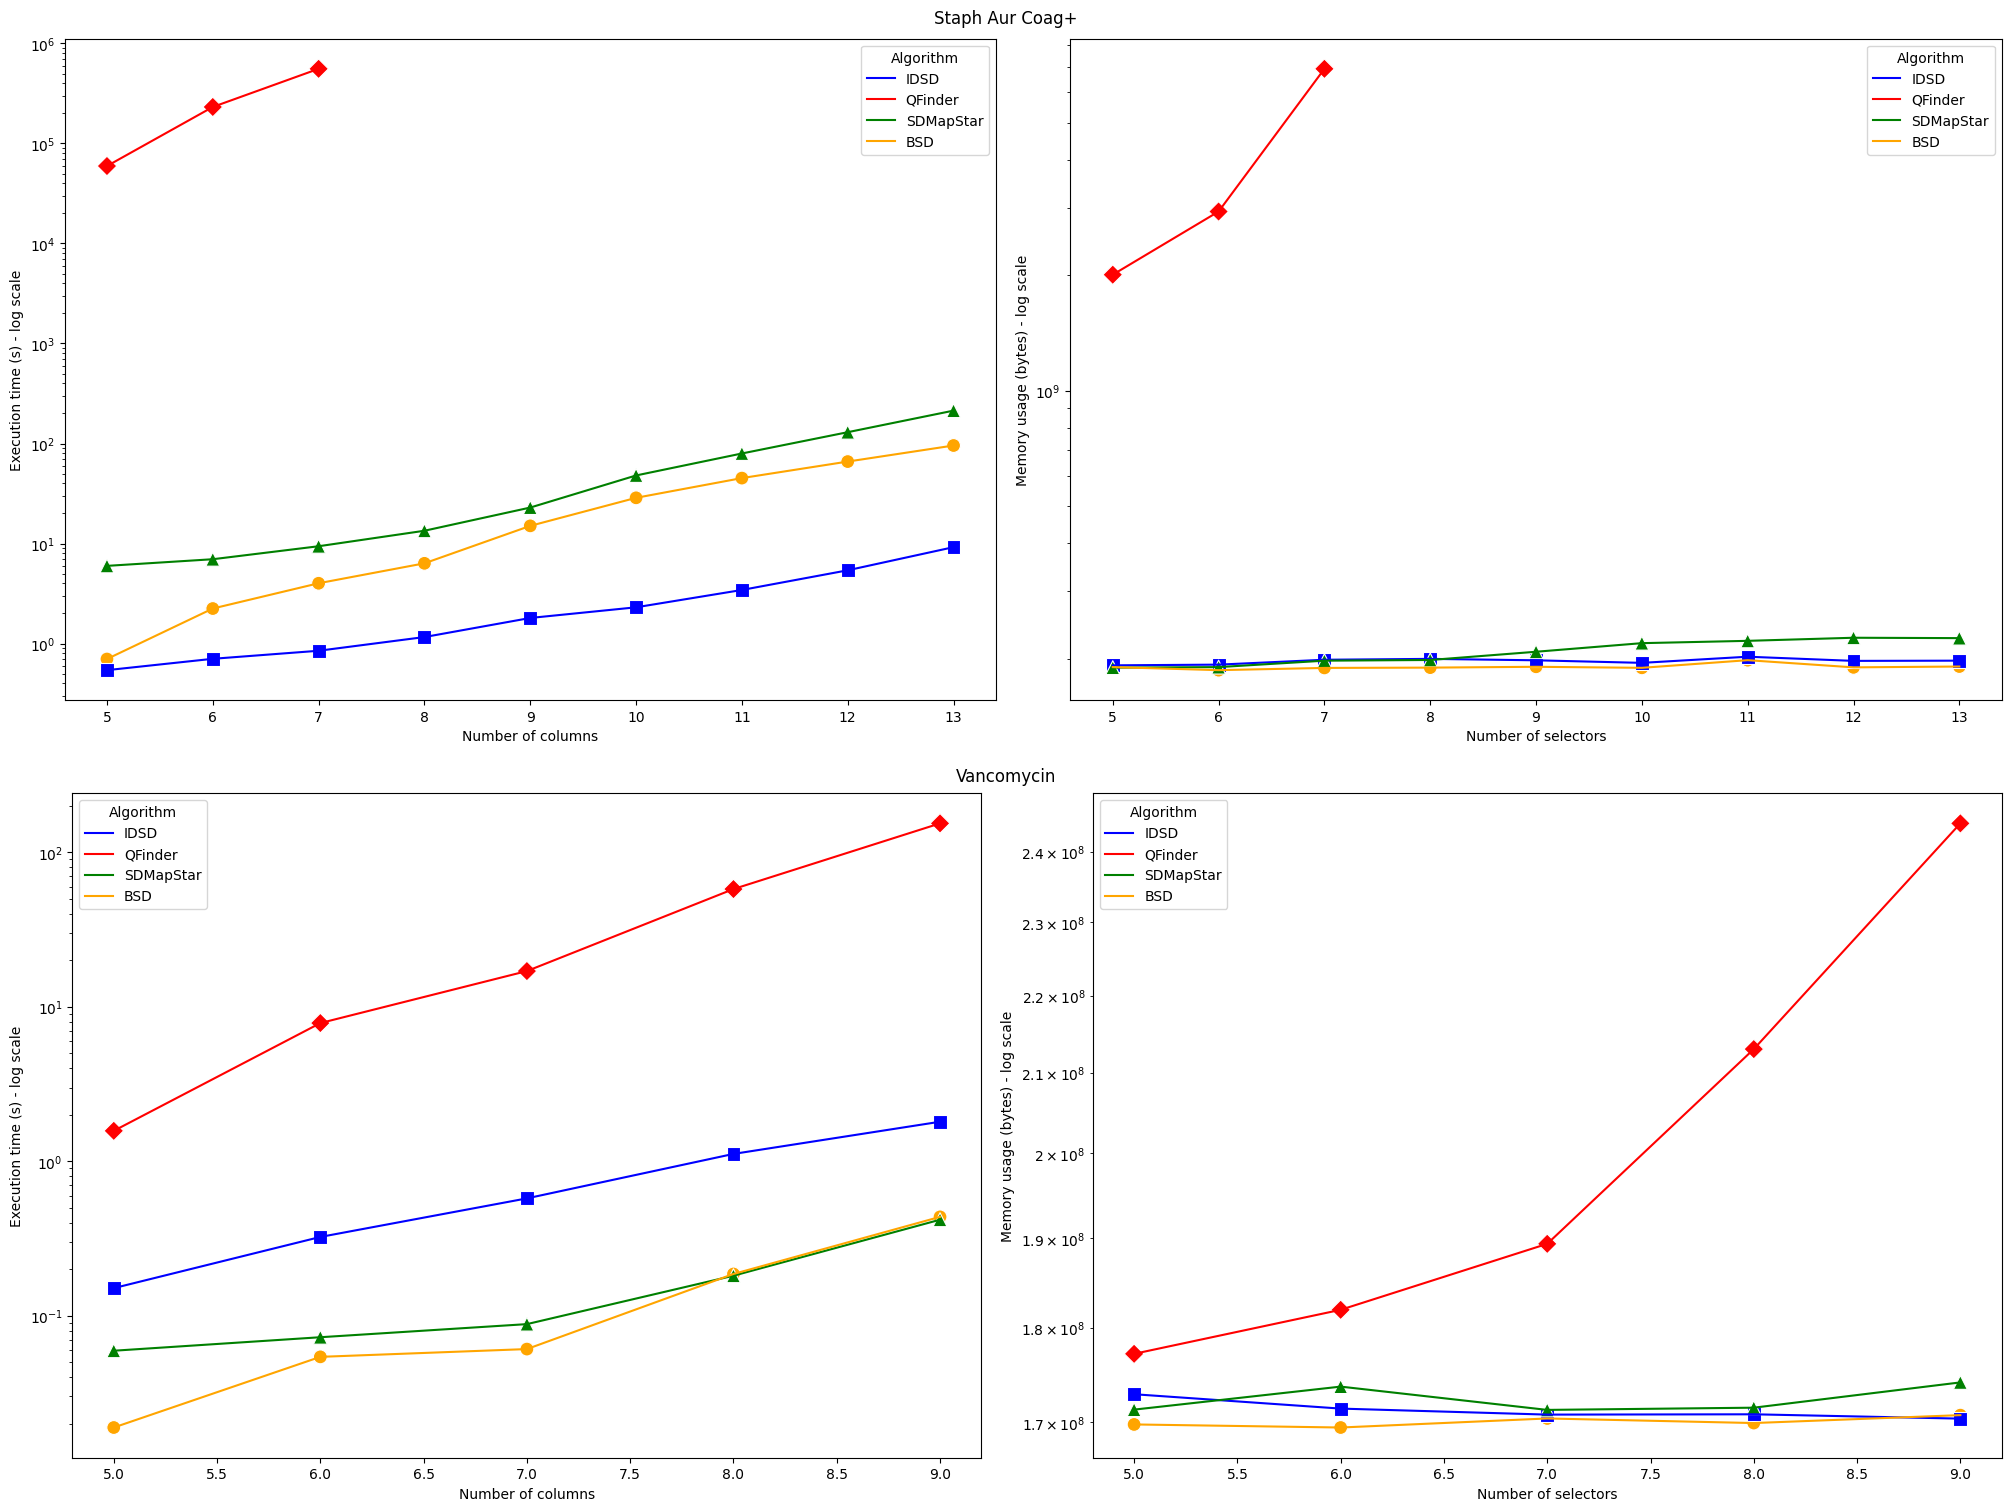

In [13]:
datasets = ["MIMIC", "AB" ]
algorithms = ["IDSD", "QFinder", "SDMapStar", "BSD"]

fig = plt.figure(constrained_layout=True, figsize=(20, 15))
subfigs = fig.subfigures(nrows=2, ncols=1)

for row, subfig in enumerate(subfigs):
    subfig.suptitle(datasets[row])
    if datasets[row] == "MIMIC":
        subfig.suptitle("Staph Aur Coag+")
    elif datasets[row] == "AB":
        subfig.suptitle("Vancomycin")
    axs = subfig.subplots(1, 2)
    sns.lineplot(data=df[df["Dataset"] == datasets[row]], x="Columns", y="Time (s)", hue="Algorithm", palette=palette, hue_order=label_order, ax=axs[0])
    sns.scatterplot(data=df[df["Dataset"] == datasets[row]], x="Columns", y="Time (s)", hue="Algorithm", legend=False, palette=palette, ax=axs[0], style="Algorithm", markers=["o", "s", "D", "^"], s=100)
    axs[0].set_yscale("log")
    axs[0].set_ylabel("Execution time (s) - log scale")
    axs[0].set_xlabel("Number of columns")
    sns.lineplot(data=df[df["Dataset"] == datasets[row]], x="Columns", y="Memory (bytes)", hue="Algorithm", palette=palette, hue_order=label_order, ax=axs[1])
    sns.scatterplot(data=df[df["Dataset"] == datasets[row]], x="Columns", y="Memory (bytes)", hue="Algorithm", legend=False, palette=palette, ax=axs[1], style="Algorithm", markers=["o", "s", "D", "^"], s=100)
    axs[1].set_yscale("log")
    axs[1].set_xlabel("Number of selectors")
    axs[1].set_ylabel("Memory usage (bytes) - log scale")

if save_flag:
    plt.savefig(f"{base_path}/all_datasets.png", bbox_inches='tight')
